In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import random

import sys
!echo {sys.executable}

!type python

from pprint import pprint as p

p(sys.path)

/Applications/Xcode.app/Contents/Developer/usr/bin/python3
python is /Users/brash/anaconda3/envs/phys340/bin/python
['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug',
 '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev',
 '/Users/brash/phys340/JupyterNotebooks/Fourier_Series',
 '/Users/brash/phys340',
 '/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip',
 '/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9',
 '/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload',
 '',
 '/Users/brash/Library/Python/3.9/lib/python/site-packages',
 '/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/site-packages',
 '/Library/Python/3.9/site-packages']


<class 'numpy.ndarray'> <class 'int'>


/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_79031/9957289.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  x , sr = librosa.load(audio_path,sr=None)


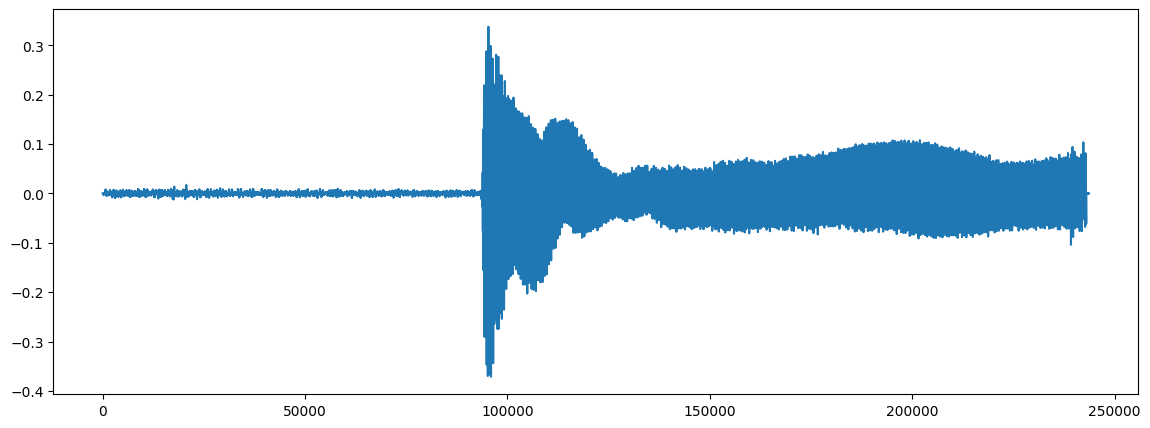

In [40]:
import librosa

audio_path = '/Users/brash/Phys340/JupyterNotebooks/Fourier_Series/GuitarSamples/LowE.mp4'
start_time = 2.18

#audio_path = '/Users/brash/Phys340/JupyterNotebooks/Fourier_Series/GuitarSamples/MidE.mp4'
#start_time = 2.38

#audio_path = '/Users/brash/Phys340/JupyterNotebooks/Fourier_Series/GuitarSamples/HighE.mp4'
#start_time = 1.88

x , sr = librosa.load(audio_path,sr=None)
print(type(x), type(sr))

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

import librosa.display
#librosa.display.waveshow(x)

plt.plot(x)

/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_79031/4227708434.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, offset=start_time,duration=3.20,sr=None)


Text(0.5, 1.0, 'Monophonic')

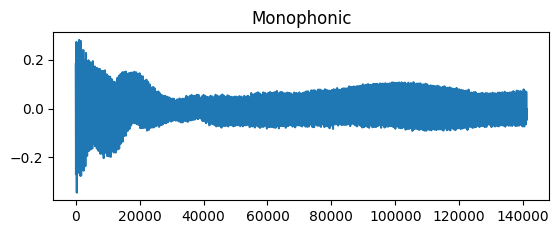

In [41]:
y, sr = librosa.load(audio_path, offset=start_time,duration=3.20,sr=None)

plt.figure()
plt.subplot(2, 1, 1)
#librosa.display.waveshow(y)
plt.plot(y)
plt.title('Monophonic')

In [42]:
sp = np.fft.fft(y)
dt = 1.0/sr
nframes = len(y)
f = []
t = []
power = []
for i in range(int(len(y)/2)):
    t.append(i*dt)
    f.append(i/(nframes*dt))
    power.append(sp.real[i]**2+sp.imag[i]**2)
t = np.array(t)
f = np.array(f)
power = np.array(power)

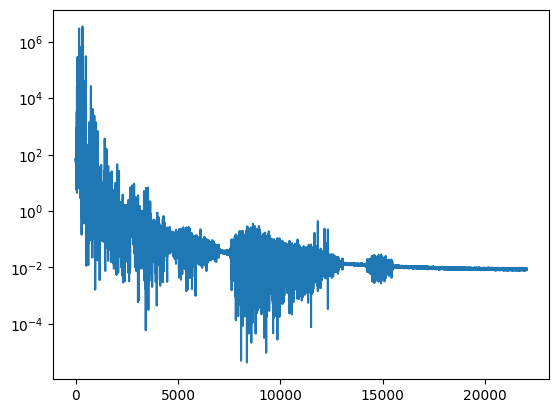

In [43]:
plt.yscale("log")
#plt.xscale("log")
plt.plot(f, power)

(0.0, 22049.84375)

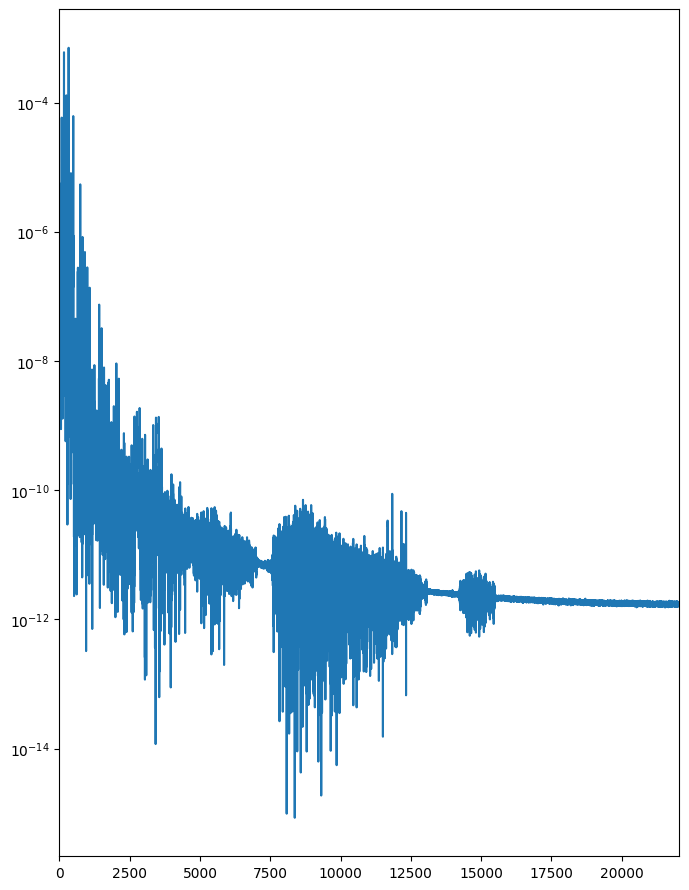

In [44]:
N_fft = len(y)
yfft = fft(y)
yfftReal =2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2

dt = 1.0/sr
f = [i/(N_fft*dt) for i in range(0,N_fft)]


fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11)) 
plt.yscale("log")
axs2.plot(f,powerfft)
axs2.set_xlim(0,np.max(f)/2)

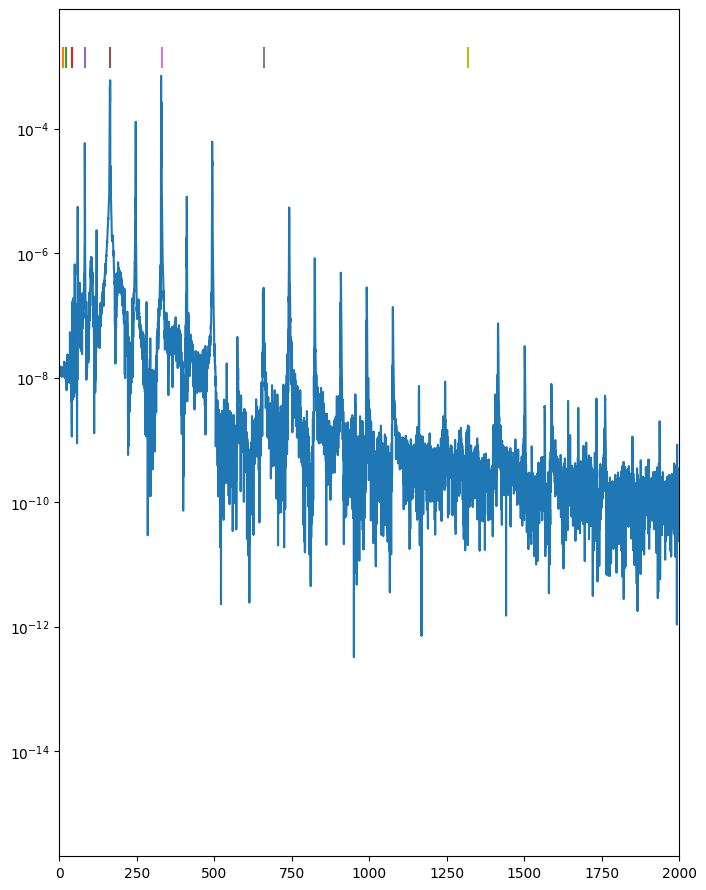

In [45]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11)) 
plt.yscale("log")
axs2.plot(f,powerfft)
axs2.set_xlim(0,2000)

efreq = [10.301,20.602,41.203,82.407,164.814,329.628,659.255,1318.51,2637.02,5274.041,10548.082,21096.164]

for i in range(len(efreq)):
    vliney = []
    vlinex = []
    vlinex.append(efreq[i])
    vliney.append(0.001)
    vlinex.append(efreq[i])
    vliney.append(0.002)
    axs2.plot(vlinex,vliney)
